In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os.path as osp
from PIL import Image

import torchvision.datasets as dset
import torchvision.transforms as T
import chest_xray_code.data.xrays as preprocess_dataset
import chest_xray_code.data.raw_reports as utils
import os
import torch.nn.functional as F
from models.NewConvModel import NewConvNet 
from models.TestConvNet import TestConvNet
from models.OscarConvModel import OscarNet as ConvNet16
from loaders.BloodCellLoader import BloodCellLoader
from loaders.BloodCellLoader256 import BloodCellLoader256
from loaders.MuseumLoader import MuseumLoader
from loaders.MuseumLoader256 import MuseumLoader256

import numpy as np

In [2]:
#xray_set = XrayLoader(
#    root='chest_xray_code/data/xrays',
#    preload=False, transform=transforms.ToTensor(),
#)
#xray_loader = DataLoader(xray_set, batch_size=20, shuffle=False, num_workers=32)

blood_cell_set = BloodCellLoader(
    root='blood_cells_data/dataset2-master/images/TEST_SIMPLE',
    preload=False, transform=transforms.ToTensor(),
)

blood_cell_loader = DataLoader(blood_cell_set, batch_size=20, shuffle=False, num_workers=32)

blood_cell_set256 = BloodCellLoader256(
    root='blood_cells_data/dataset2-master/images/TEST_SIMPLE',
    preload=False, transform=transforms.ToTensor(),
)

blood_cell_loader256 = DataLoader(blood_cell_set256, batch_size=20, shuffle=False, num_workers=32)


"""
museum_set = MuseumLoader(
    root='museum_data/dataset_updated/validation_set',
    preload=False, transform=transforms.ToTensor(),
)

museum_loader = DataLoader(museum_set, batch_size=20, shuffle=False, num_workers=32)


museum_set256 = MuseumLoader256(
    root='museum_data/dataset_updated/validation_set',
    preload=False, transform=transforms.ToTensor(),
)

museum_loader256 = DataLoader(museum_set256, batch_size=20, shuffle=False, num_workers=32)
"""

print(len(blood_cell_set))
print(len(blood_cell_set256))

71
71


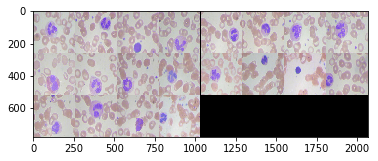

In [3]:
def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    img = img.numpy()
    
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 2 * (img - img_min) / (img_max - img_min)
    
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.savefig('compressed.png')
    
    # functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.savefig('original.png')

# get some random training images
dataiter = iter(blood_cell_loader256)
images = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [4]:
class ConvNet16(nn.Module):
    def __init__(self,channels,size):
        super().__init__()

        self.conv_1_compress = nn.Conv2d(channels, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.relu_1_compress = nn.ReLU()
        
        self.conv_2_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_2_compress = nn.BatchNorm2d(size)
        self.relu_2_compress = nn.ReLU()
        
        self.conv_3_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_3_compress = nn.BatchNorm2d(size)
        self.relu_3_compress = nn.ReLU()
        
        self.conv_4_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_4_compress = nn.BatchNorm2d(size)
        self.relu_4_compress = nn.ReLU()
        
        self.conv_5_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_5_compress = nn.BatchNorm2d(size)
        self.relu_5_compress = nn.ReLU()
        
        self.conv_6_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_6_compress = nn.BatchNorm2d(size)
        self.relu_6_compress = nn.ReLU()

        self.conv_downsize_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_downsize_compress = nn.BatchNorm2d(size)
        self.relu_downsize_compress = nn.ReLU()
        
        self.conv_7_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_7_compress = nn.BatchNorm2d(size)
        self.relu_7_compress = nn.ReLU()
        
        self.conv_8_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_8_compress = nn.BatchNorm2d(size)
        self.relu_8_compress = nn.ReLU()
        
        self.conv_9_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_9_compress = nn.BatchNorm2d(size)
        self.relu_9_compress = nn.ReLU()
        
        self.conv_10_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_10_compress = nn.BatchNorm2d(size)
        self.relu_10_compress = nn.ReLU()
        
        self.conv_11_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_11_compress = nn.BatchNorm2d(size)
        self.relu_11_compress = nn.ReLU()
        
        self.conv_12_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_12_compress = nn.BatchNorm2d(size)
        self.relu_12_compress = nn.ReLU()
        
        self.conv_13_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_13_compress = nn.BatchNorm2d(size)
        self.relu_13_compress = nn.ReLU()
        
        
        self.conv_compress_final = nn.Conv2d(size, channels, kernel_size=3,stride=1,padding=1,bias=True)
        
        self.upscaling = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_1_decompress = nn.Conv2d(channels, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.relu_1_decompress = nn.ReLU()
        
        self.conv_2_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_2_decompress = nn.BatchNorm2d(size)
        self.relu_2_decompress = nn.ReLU()
        
        self.conv_3_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_3_decompress = nn.BatchNorm2d(size)
        self.relu_3_decompress = nn.ReLU()
        
        self.conv_4_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_4_decompress = nn.BatchNorm2d(size)
        self.relu_4_decompress = nn.ReLU()
        
        self.upscaling2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_5_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_5_decompress = nn.BatchNorm2d(size)
        self.relu_5_decompress = nn.ReLU()
        
        self.conv_6_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_6_decompress = nn.BatchNorm2d(size)
        self.relu_6_decompress = nn.ReLU()
        
        self.conv_7_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_7_decompress = nn.BatchNorm2d(size)
        self.relu_7_decompress = nn.ReLU()
        
        self.conv_8_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_8_decompress = nn.BatchNorm2d(size)
        self.relu_8_decompress = nn.ReLU()
        
        self.upscaling3 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_9_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_9_decompress = nn.BatchNorm2d(size)
        self.relu_9_decompress = nn.ReLU()
        
        self.conv_10_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_10_decompress = nn.BatchNorm2d(size)
        self.relu_10_decompress = nn.ReLU()
        
        self.conv_11_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_11_decompress = nn.BatchNorm2d(size)
        self.relu_11_decompress = nn.ReLU()
        
        self.conv_12_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_12_decompress = nn.BatchNorm2d(size)
        self.relu_12_decompress = nn.ReLU()
        
        self.upscaling4 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_13_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_13_decompress = nn.BatchNorm2d(size)
        self.relu_13_decompress = nn.ReLU()
        
        self.conv_14_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_14_decompress = nn.BatchNorm2d(size)
        self.relu_14_decompress = nn.ReLU()
        
        self.conv_15_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_15_decompress = nn.BatchNorm2d(size)
        self.relu_15_decompress = nn.ReLU()
        
        self.conv_16_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_16_decompress = nn.BatchNorm2d(size)
        self.relu_16_decompress = nn.ReLU()
        
        self.conv_17_decompress = nn.Conv2d(size, 3, kernel_size=3,stride=1,padding=1,bias=True)
        

    def forward(self, x):
        scores = None
        model = torch.nn.Sequential( 
            
            self.conv_1_compress,
            self.relu_1_compress,
        
            self.conv_2_compress,
            self.batchnorm_2_compress,
            self.relu_2_compress,
            
            self.conv_3_compress,
            self.batchnorm_3_compress,
            self.relu_3_compress,
            
            self.conv_4_compress,
            self.batchnorm_4_compress,
            self.relu_4_compress,
            
            self.conv_5_compress,
            self.batchnorm_5_compress,
            self.relu_5_compress,
            
            self.conv_6_compress,
            self.batchnorm_6_compress,
            self.relu_6_compress,
            
            self.conv_downsize_compress,
            self.batchnorm_downsize_compress,
            self.relu_downsize_compress,
            
            self.conv_7_compress,
            self.batchnorm_7_compress,
            self.relu_7_compress,
            
            self.conv_8_compress,
            self.batchnorm_8_compress,
            self.relu_8_compress,
            
            self.conv_9_compress,
            self.batchnorm_9_compress,
            self.relu_9_compress,
            
            self.conv_10_compress,
            self.batchnorm_10_compress,
            self.relu_10_compress,
            
            self.conv_11_compress,
            self.batchnorm_11_compress,
            self.relu_11_compress,
            
            self.conv_12_compress,
            self.batchnorm_12_compress,
            self.relu_12_compress,
            
            self.conv_13_compress,
            self.batchnorm_13_compress,
            self.relu_13_compress,
            
            self.conv_compress_final,
        
            self.upscaling,
            
            self.conv_1_decompress,
            self.relu_1_decompress,
        
            self.conv_2_decompress,
            self.batchnorm_2_decompress,
            self.relu_2_decompress,
            
            self.conv_3_decompress,
            self.batchnorm_3_decompress,
            self.relu_3_decompress,
            
            self.conv_4_decompress,
            self.batchnorm_4_decompress,
            self.relu_4_decompress,
            
            self.upscaling2,
            
            self.conv_5_decompress,
            self.batchnorm_5_decompress,
            self.relu_5_decompress,
            
            self.conv_6_decompress,
            self.batchnorm_6_decompress,
            self.relu_6_decompress,
            
            self.conv_7_decompress,
            self.batchnorm_7_decompress,
            self.relu_7_decompress,
            
            self.conv_8_decompress,
            self.batchnorm_8_decompress,
            self.relu_8_decompress,
            
            self.upscaling3,
            
            self.conv_9_decompress,
            self.batchnorm_9_decompress,
            self.relu_9_decompress,
            
            self.conv_10_decompress,
            self.batchnorm_10_decompress,
            self.relu_10_decompress,
            
            self.conv_11_decompress,
            self.batchnorm_11_decompress,
            self.relu_11_decompress,
            
            self.conv_12_decompress,
            self.batchnorm_12_decompress,
            self.relu_12_decompress,
            
            self.upscaling4,
        
            self.conv_13_decompress,
            self.batchnorm_13_decompress,
            self.relu_13_decompress,
            
            self.conv_14_decompress,
            self.batchnorm_14_decompress,
            self.relu_14_decompress,
            
            self.conv_15_decompress,
            self.batchnorm_15_decompress,
            self.relu_15_decompress,
            
            self.conv_16_decompress,
            self.batchnorm_16_decompress,
            self.relu_16_decompress,
            
            self.conv_17_decompress

            
        ).to(device)
        scores = model(x)
        return scores

In [5]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    #dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 5


# Architecture

In [6]:
def train(model, epoch, log_interval=100):
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    model = torch.nn.DataParallel(model)
    model.train()  # set training mode
    iteration = 0
    for ep in range(epoch):
        for batch_idx, (data) in enumerate(trainset_loader):
            data = data.to(device=device, dtype=dtype)
            optimizer.zero_grad()
            #print(data.shape)
            reconstruction = model(data)
            loss_function = nn.MSELoss(size_average=True)
            loss = loss_function(reconstruction, data)
            loss.backward()
            optimizer.step()
        if ep % print_every == 0:
            print('Iteration %d, loss = %.4f' % (ep, loss.item()))
            print()

def test():
    model.eval()  # set evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data in testset_loader:
            data = data.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testset_loader.dataset)
    print('\nTest set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testset_loader.dataset),
        100. * correct / len(testset_loader.dataset)))
    

In [7]:
channels = 3
size = 32
model100 = torch.load('trained_models/blood_200_1000.pt')
model50 = NewConvNet(channels,size,device)
model50.load_state_dict(torch.load('new_blood_cell.pt'))
model16 = ConvNet16(channels,size)
model16 = torch.load('extra_bloodtest_notebooks/blood16.pt')

/home/shared/anaconda3/lib/python3.6/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'models.TestConvNet.TestConvNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/shared/anaconda3/lib/python3.6/site-packages/torch/serialization.py:333: UserWarning: Couldn't retrieve source code for container of type ConvNet16. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


Visualize the Compressed images 

In [8]:
#model = torch.load('trained_models/xraymodelV2.pt')

plt.close("all")


all_images = [[],[],[],[]]

def prep(img):
    img = img.numpy()
    if True:
        img_max, img_min = np.max(img), np.min(img)
        img = (img - img_min) / (img_max - img_min) 
    return np.transpose(img, (1, 2, 0)) 
    
def save_compressed(self,input,output):
    #for i in range(1):
    img = output.cpu().detach()
    for i in range(img.shape[0]):
        individual_img = img[i]
        all_images[1].append(prep(individual_img))

def save_original_and_jpeg(data,path,q):
    img = data.cpu().detach()

    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        all_images[0].append(individual_img) #append original

        rescaled = (255.0 * individual_img)
        rescaled = rescaled.astype('uint8')
        
        PIL_img = Image.fromarray(rescaled)
        jpeg_filename =  path +"/"+ str(i) + "jpeg.jpeg"
        PIL_img.save(jpeg_filename,"JPEG",quality=q)
     
        jpeg_compressed = Image.open(jpeg_filename)
        jpeg_compressed = np.asarray(jpeg_compressed)
        #jpeg_compressed = np.transpose(jpeg_compressed,(1,2,0))
        all_images[3].append(jpeg_compressed) #append jpeg

def save_reconstructed(r):
    r = r.cpu().detach()
    
    for i in range(r.shape[0]):
        individual_img = r[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        individual_img = np.clip(individual_img,0,1)
        all_images[2].append(individual_img)
        

def save_original(data):
    img = data.cpu().detach()
    
    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        all_images[0].append(individual_img)


#hook.remove()
def save_from_numpy(img,file_path):
    img = 255.0 * img
    img = img.astype('uint8')
    if img.shape[2] != 3:
        img = np.transpose(img,(1,2,0))
    img = Image.fromarray(img)
    img.save(file_path)



def visualize(dataset_loader,model,file_path,quality):
    i = 0
    print("hello")
    
    hook = model.conv_compress_final.register_forward_hook(save_compressed)
    
    
    reconstruction = None
    print("iterating through dataset")
    for data in dataset_loader:
        with torch.no_grad():
            if i > 0: break
            data = data.to(device)
            save_original_and_jpeg(data,file_path,quality)
            reconstruction = model(data)
            save_reconstructed(reconstruction)
            i+=1
    
    avg_psnr_rec = 0.0
    avg_psnr_jpeg = 0.0

    for i in range(20):
        plt.figure()
        org = all_images[0][i]
        print(org.shape)
        save_from_numpy(org,file_path+"/"+str(i)+"org.png")
        plt.subplot(1, 4, 1)
        plt.axis('off')
        #imshow_noax(org, normalize=False)
        plt.imshow(org)
        plt.title('Original')
        plt.subplot(1, 4, 2)
        com = all_images[1][i]
        plt.imshow(com)
        save_from_numpy(com,file_path+"/"+str(i)+"com.png")
        print(com.shape)
        #imshow_noax(rec, normalize=False)
        plt.title('Compressed')
        plt.axis('off')
        plt.subplot(1, 4, 3)
        recon = all_images[2][i]
        print(recon.shape)
        save_from_numpy(recon,file_path+"/"+str(i)+"recon.png")
        plt.axis('off')
        plt.imshow(recon)
        plt.title('Reconstructed')
        plt.subplot(1, 4, 4)
        jpg = all_images[3][i]
        #save_from_numpy(jpg,file_path+"/"+str(i)+"jpg.png")
        print(jpg.shape)
        plt.axis('off')
        plt.imshow(jpg)
        plt.title('JPG')
        plt.show()

        mserec = np.sum((org - recon)**2) / (org.shape[0]**2)
        psnr = -10*np.log10(mserec)
        avg_psnr_rec += psnr
        print('image%s reconstruction PSNR: %s' % (i,psnr))
        msejpeg = np.sum((org - jpg/255.0)**2) / (org.shape[0]**2)
        psnr = -10*np.log10(msejpeg)
        avg_psnr_jpeg += psnr
        print('image%s jpeg PSNR: %s' % (i,psnr))
        
    avg_psnr_rec = avg_psnr_rec/20
    avg_psnr_jpeg = avg_psnr_jpeg/20
    print('')
    print('Average reconstruction PSNR: %s' % avg_psnr_rec)
    print('Average JPEG PSNR: %s' % avg_psnr_jpeg)   
    print('')



Visualize the Reconstructed Images

hello
iterating through dataset
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


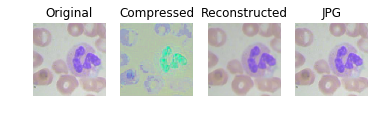

image0 reconstruction PSNR: 24.26580375358149
image0 jpeg PSNR: 53.811942804264
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


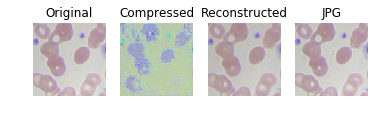

image1 reconstruction PSNR: 24.210565967189872
image1 jpeg PSNR: 53.67048384208267
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


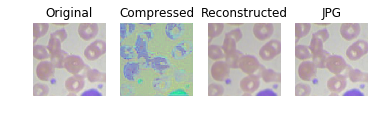

image2 reconstruction PSNR: 24.673774678558047
image2 jpeg PSNR: 53.52145078356524
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


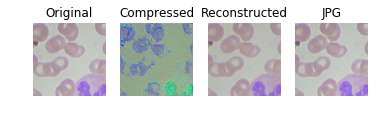

image3 reconstruction PSNR: 25.37502725585801
image3 jpeg PSNR: 53.598004526577284
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


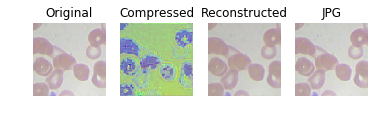

image4 reconstruction PSNR: 24.02166292373886
image4 jpeg PSNR: 54.09402391730009
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


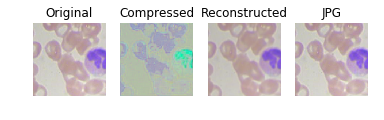

image5 reconstruction PSNR: 24.16678967389446
image5 jpeg PSNR: 53.5584217825777
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


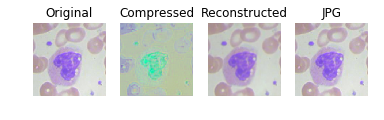

image6 reconstruction PSNR: 23.59306268950806
image6 jpeg PSNR: 53.267207900283495
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


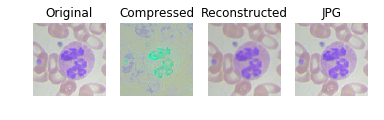

image7 reconstruction PSNR: 23.904067223810415
image7 jpeg PSNR: 53.67165045184109
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


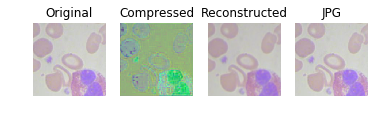

image8 reconstruction PSNR: 23.423720715258646
image8 jpeg PSNR: 54.25779671760922
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


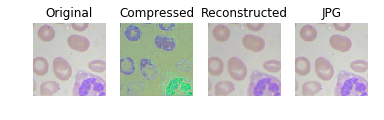

image9 reconstruction PSNR: 23.612373399983134
image9 jpeg PSNR: 53.542915868915905
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


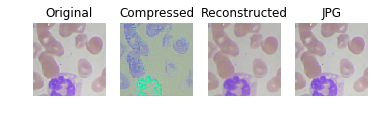

image10 reconstruction PSNR: 25.00139438716193
image10 jpeg PSNR: 53.96439938895107
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


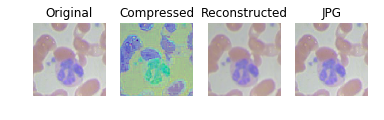

image11 reconstruction PSNR: 25.097219376005448
image11 jpeg PSNR: 53.79390658198177
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


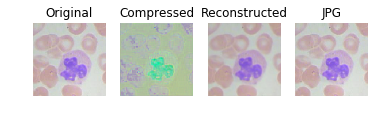

image12 reconstruction PSNR: 23.568604400775616
image12 jpeg PSNR: 53.749734282106935
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


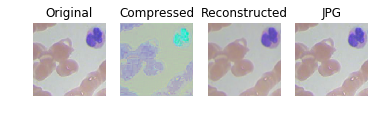

image13 reconstruction PSNR: 25.299026376034128
image13 jpeg PSNR: 54.03274136386002
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


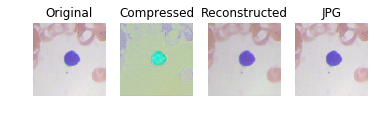

image14 reconstruction PSNR: 22.60116059937783
image14 jpeg PSNR: 54.50503803736368
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


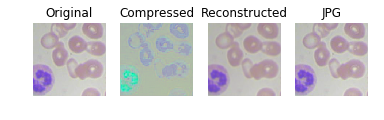

image15 reconstruction PSNR: 24.88802443131814
image15 jpeg PSNR: 54.15966353272617
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


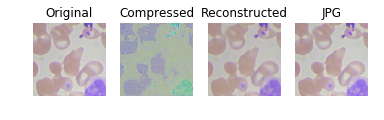

image16 reconstruction PSNR: 24.643391550435343
image16 jpeg PSNR: 53.805922585134326
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


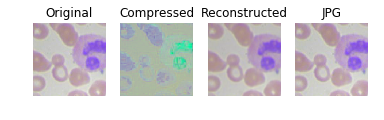

image17 reconstruction PSNR: 24.32680088256526
image17 jpeg PSNR: 53.649153993499894
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


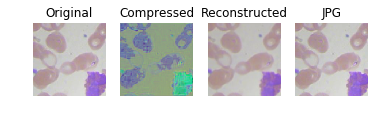

image18 reconstruction PSNR: 24.65082070717992
image18 jpeg PSNR: 53.863658513291654
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


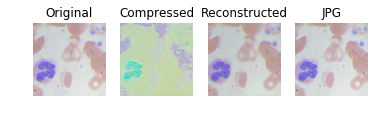

image19 reconstruction PSNR: 23.39513674307606
image19 jpeg PSNR: 54.20647324363655

Average reconstruction PSNR: 24.235921386765533
Average JPEG PSNR: 53.83622950587844

hello
iterating through dataset
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


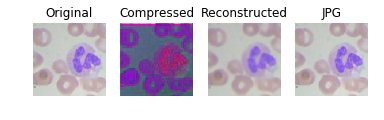

image0 reconstruction PSNR: 24.34019449362392
image0 jpeg PSNR: 48.32304621090585
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


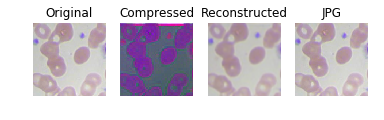

image1 reconstruction PSNR: 23.81684837236702
image1 jpeg PSNR: 47.90342858003704
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


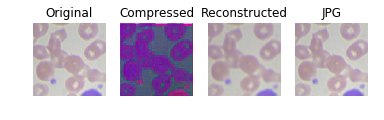

image2 reconstruction PSNR: 24.58331845961208
image2 jpeg PSNR: 47.9062105897097
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


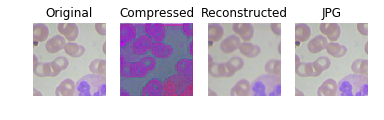

image3 reconstruction PSNR: 25.11547900736226
image3 jpeg PSNR: 48.013937452481144
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


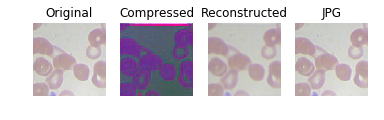

image4 reconstruction PSNR: 23.222055045656415
image4 jpeg PSNR: 48.605422135601756
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


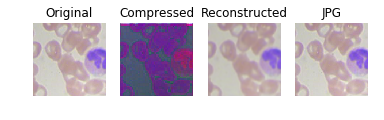

image5 reconstruction PSNR: 23.762632029287968
image5 jpeg PSNR: 48.020176378023194
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


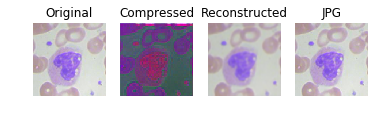

image6 reconstruction PSNR: 22.513815030588916
image6 jpeg PSNR: 47.84082349943445
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


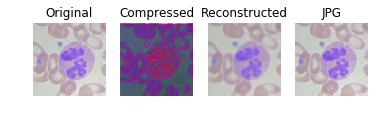

image7 reconstruction PSNR: 23.624696411995615
image7 jpeg PSNR: 47.6658521319891
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


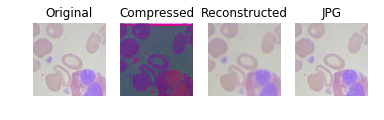

image8 reconstruction PSNR: 23.77453719927436
image8 jpeg PSNR: 48.45099744859934
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


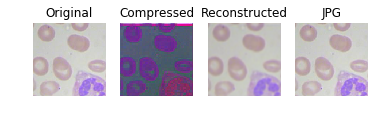

image9 reconstruction PSNR: 23.719774140266793
image9 jpeg PSNR: 48.26051236793448
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


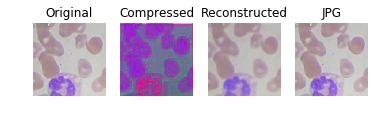

image10 reconstruction PSNR: 24.607408119918862
image10 jpeg PSNR: 48.13482294132366
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


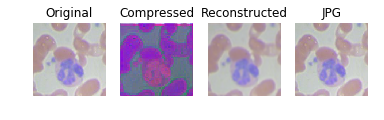

image11 reconstruction PSNR: 24.998261356380045
image11 jpeg PSNR: 48.19533980993672
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


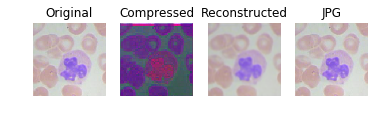

image12 reconstruction PSNR: 23.169056967698737
image12 jpeg PSNR: 48.305829639247136
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


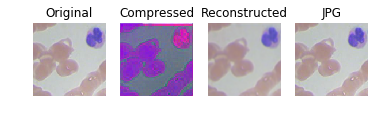

image13 reconstruction PSNR: 24.986465925125675
image13 jpeg PSNR: 48.42268786503919
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


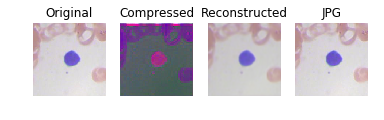

image14 reconstruction PSNR: 21.09517340055849
image14 jpeg PSNR: 49.115949071505334
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


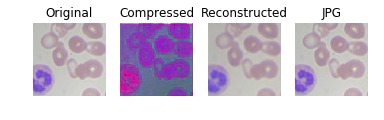

image15 reconstruction PSNR: 24.537501254852256
image15 jpeg PSNR: 48.19533956951196
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


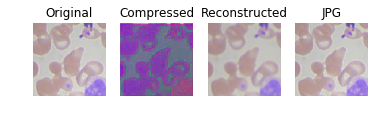

image16 reconstruction PSNR: 24.34604462290258
image16 jpeg PSNR: 47.93154420654729
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


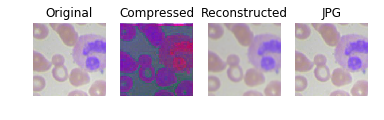

image17 reconstruction PSNR: 24.641346308471782
image17 jpeg PSNR: 47.891389914056035
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


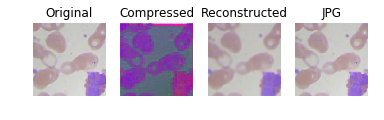

image18 reconstruction PSNR: 24.288129295441205
image18 jpeg PSNR: 48.12418670670526
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


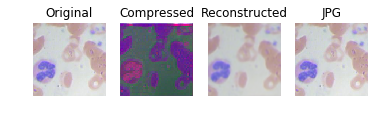

image19 reconstruction PSNR: 22.031024232364746
image19 jpeg PSNR: 48.47443679926592

Average reconstruction PSNR: 23.85868808368749
Average JPEG PSNR: 48.189096665892734

hello
iterating through dataset
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


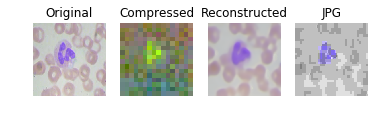

image0 reconstruction PSNR: 21.701487912154484
image0 jpeg PSNR: 20.10935795008606
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


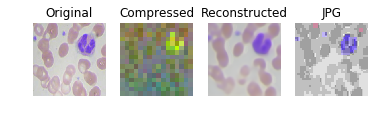

image1 reconstruction PSNR: 21.121848791308658
image1 jpeg PSNR: 19.04993427909534
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


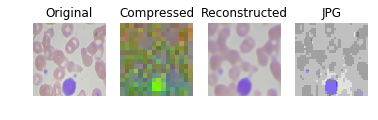

image2 reconstruction PSNR: 22.139181822911365
image2 jpeg PSNR: 19.934303556647855
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


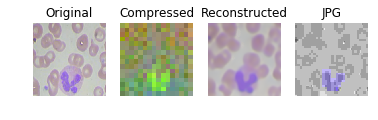

image3 reconstruction PSNR: 21.261580946951728
image3 jpeg PSNR: 20.2356207697541
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


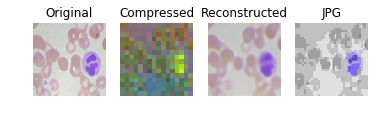

image4 reconstruction PSNR: 20.73310874368248
image4 jpeg PSNR: 19.334311920079237
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


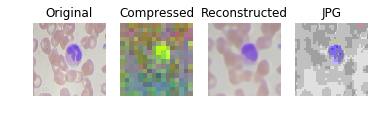

image5 reconstruction PSNR: 21.328079201040353
image5 jpeg PSNR: 19.0094785394497
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


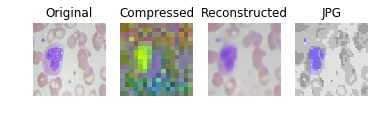

image6 reconstruction PSNR: 20.402594228701048
image6 jpeg PSNR: 19.472501732997827
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


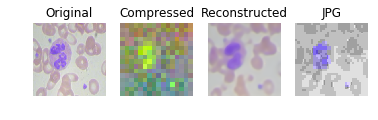

image7 reconstruction PSNR: 20.83985258695745
image7 jpeg PSNR: 19.21660034097766
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


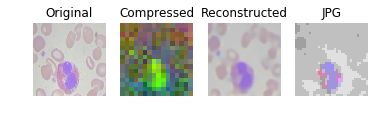

image8 reconstruction PSNR: 21.913808776078486
image8 jpeg PSNR: 20.21651830397977
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


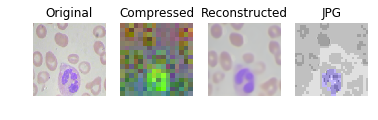

image9 reconstruction PSNR: 21.875881845051012
image9 jpeg PSNR: 19.856499854929833
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


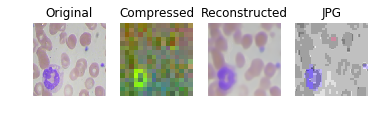

image10 reconstruction PSNR: 21.641398208189226
image10 jpeg PSNR: 19.83217330064903
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


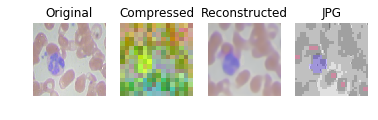

image11 reconstruction PSNR: 22.064499662046906
image11 jpeg PSNR: 19.712811976029645
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


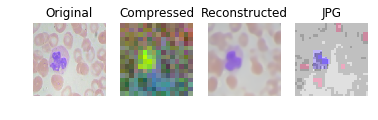

image12 reconstruction PSNR: 21.471572605081274
image12 jpeg PSNR: 19.847502177352784
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


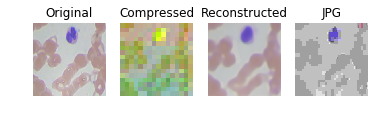

image13 reconstruction PSNR: 22.627798275871346
image13 jpeg PSNR: 20.25850759765251
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


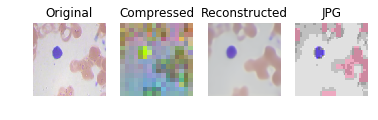

image14 reconstruction PSNR: 19.450545556889388
image14 jpeg PSNR: 20.46028726768244
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


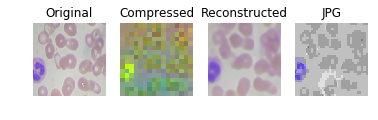

image15 reconstruction PSNR: 21.97705440980032
image15 jpeg PSNR: 20.314303872275286
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


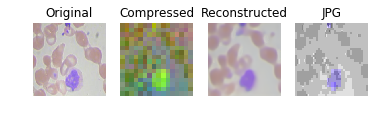

image16 reconstruction PSNR: 21.977652895921025
image16 jpeg PSNR: 19.77032592608039
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


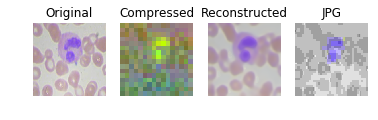

image17 reconstruction PSNR: 21.52354723100666
image17 jpeg PSNR: 19.144434564220003
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


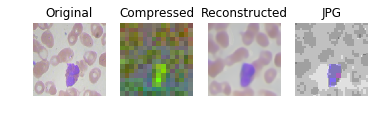

image18 reconstruction PSNR: 21.667792063655064
image18 jpeg PSNR: 19.79240844801264
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


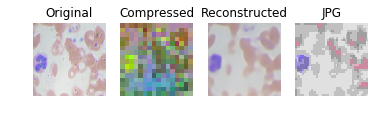

image19 reconstruction PSNR: 20.096522138643515
image19 jpeg PSNR: 19.57207524291529

Average reconstruction PSNR: 21.39079039509709
Average JPEG PSNR: 19.756997881043368



In [9]:
visualize(blood_cell_loader,model100,"results/bloodcell/100",100)
all_images = [[],[],[],[]]
visualize(blood_cell_loader,model50,"results/bloodcell/50",95)
all_images = [[],[],[],[]]
visualize(blood_cell_loader256,model16.module,"results/bloodcell/16",1)
